✅ Dataset loaded successfully!

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB

--- Summary Statistics ---


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000



--- Missing Values ---


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Number of rows: 6435
Number of columns: 8
Number of unique stores: 45
Date range: 2010-02-05 00:00:00 to 2012-10-26 00:00:00


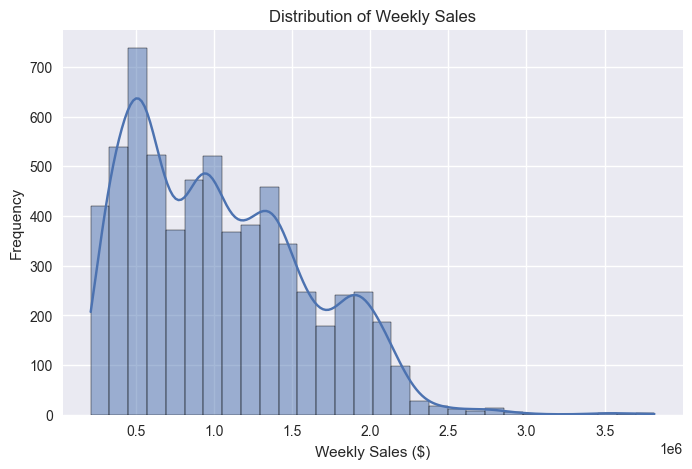

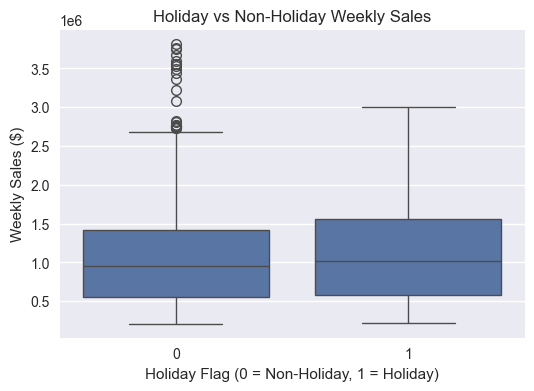

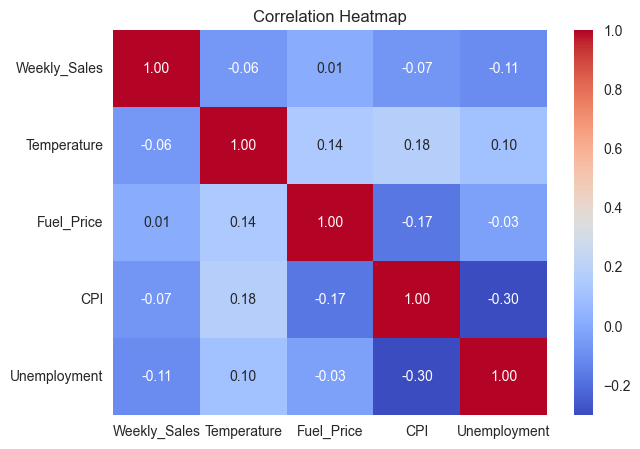

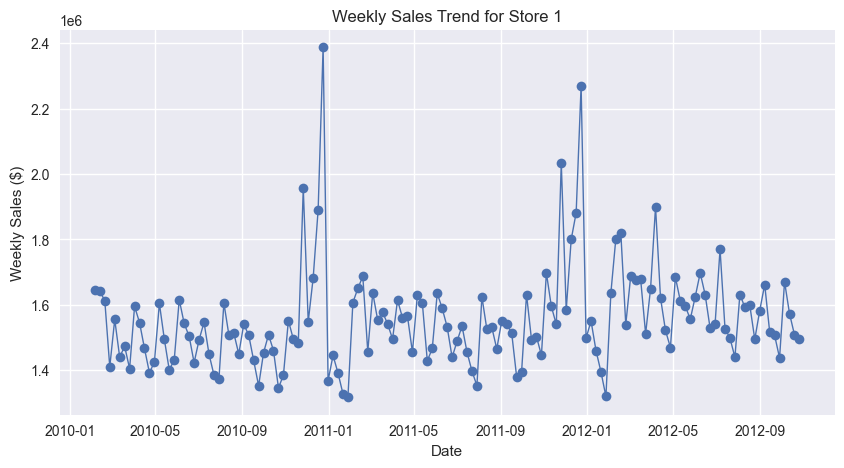


✅ Data Exploration Completed Successfully!
- Total records: 6435
- Stores analyzed: 45
- Date range: 2010-02-05 → 2012-10-26
- Next step: Data cleaning and preprocessing (handle missing values, outliers, etc.)


In [3]:
# ==========================================================
# 🏪 Walmart Sales Analysis - Data Exploration Notebook
# ==========================================================

# 📦 Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better chart visuals
plt.style.use('seaborn-v0_8')

# ==========================================================
# 📂 Load the dataset
# ==========================================================
# Make sure the file path matches your folder structure
df = pd.read_csv('../data/raw/Walmart_Store_sales.csv')

# Preview the first few rows
print("✅ Dataset loaded successfully!")
df.head()

# ==========================================================
# 🔍 Basic info and structure
# ==========================================================
print("\n--- Dataset Info ---")
df.info()

print("\n--- Summary Statistics ---")
display(df.describe())

print("\n--- Missing Values ---")
display(df.isnull().sum())

# ==========================================================
# 🧩 Quick checks
# ==========================================================
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("Number of unique stores:", df['Store'].nunique())

# Check the date range (convert if needed)
if df['Date'].dtype != 'datetime64[ns]':
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
print("Date range:", df['Date'].min(), "to", df['Date'].max())

# ==========================================================
# 📊 Univariate Exploration
# ==========================================================

# 1️⃣ Distribution of Weekly Sales
plt.figure(figsize=(8,5))
sns.histplot(df['Weekly_Sales'], bins=30, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales ($)')
plt.ylabel('Frequency')
plt.show()

# 2️⃣ Holiday vs Non-Holiday Weeks
plt.figure(figsize=(6,4))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title('Holiday vs Non-Holiday Weekly Sales')
plt.xlabel('Holiday Flag (0 = Non-Holiday, 1 = Holiday)')
plt.ylabel('Weekly Sales ($)')
plt.show()

# ==========================================================
# 📈 Correlation Analysis
# ==========================================================
numeric_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
corr = df[numeric_cols].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# ==========================================================
# 🕒 Sales Trend Over Time (Sample)
# ==========================================================
plt.figure(figsize=(10,5))
sample_store = df[df['Store'] == 1]
sample_store = sample_store.sort_values('Date')

plt.plot(sample_store['Date'], sample_store['Weekly_Sales'], marker='o', linewidth=1)
plt.title('Weekly Sales Trend for Store 1')
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')
plt.grid(True)
plt.show()

# ==========================================================
# ✅ Quick Summary
# ==========================================================
print("\n✅ Data Exploration Completed Successfully!")
print(f"- Total records: {df.shape[0]}")
print(f"- Stores analyzed: {df['Store'].nunique()}")
print(f"- Date range: {df['Date'].min().date()} → {df['Date'].max().date()}")
print("- Next step: Data cleaning and preprocessing (handle missing values, outliers, etc.)")